# **UrbanSound8K 🎵**

### EDA, FEATURE ENGINEERING & SELECTION

In [38]:
# import libraries
import os
import glob
import utils
import config
import random
import numpy 
import librosa
import librosa.display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from playsound import playsound
from scipy.stats import skew, kurtosis

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#import dataset
pwd = os.getcwd()
data = pd.read_csv(os.path.join(pwd, config.CSV_FILE_PATH))
df = data.copy()
df.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


The dataset contains the meta-data about the audio files. which include the audio file names, the unique classes it belongs to, the audio ID from its original extracted [source](www.freesound.org), The slice time (start and end) from the original audio file recording, as well as the folder where the audio resides.   

In [19]:
# unique classes
df['class'].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

The list above shows the unique classes of the audio files contained in the dataset

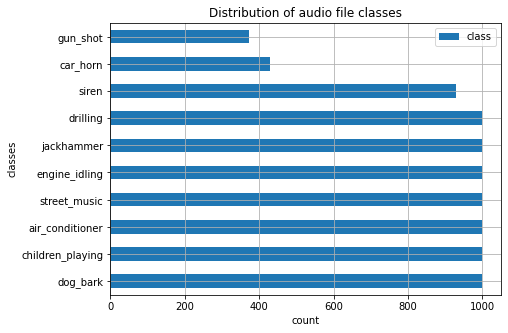

In [3]:
# check for imbalance in distibution audio classes
plt.figure(figsize=(7,5))
df['class'].value_counts().plot(kind='barh')
plt.grid(True)
plt.legend()
plt.title('Distribution of audio file classes')
plt.xlabel('count')
plt.ylabel('classes')
plt.show()

the distribution of the unique audio classes seem to be quite alright except the `gun_shot ` and `car_horn ` class which has less samples compared to the rest of the classes

In [4]:
# record length of all the 'audio files
df[['start', 'end']].head(5)

,start,end
0,0.0,0.317551
1,58.5,62.500000
2,60.5,64.500000
3,63.0,67.000000
4,68.5,72.500000


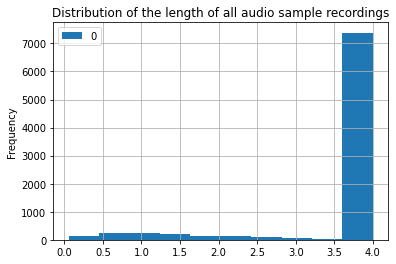

The average length range of each audio recording time present in the dataset is 3.6 secs to 4.0 secs


In [5]:
pd.DataFrame(df['end'] - df['start']).plot(kind='hist')
plt.grid(True)
plt.legend()
plt.title('Distribution of the length of all audio sample recordings')
plt.show()

print(f'The average length range of each audio recording time present in the dataset is {np.round(np.mean(df["end"] - df["start"]), 1)} secs to 4.0 secs')

In [6]:
# unique classes 
audio_classes = [ 'air_conditioner', 'car_horn', 
'children_playing', 'dog_bark', 'drilling', 
'engine_idling', 'gun_shot', 'jackhammer', 
'siren', 'street_music']

In [7]:
# audio file save format: format: [fsID]-[classID]-[occurrenceID]-[sliceID].wav  

6988-5-0-5.wav 5


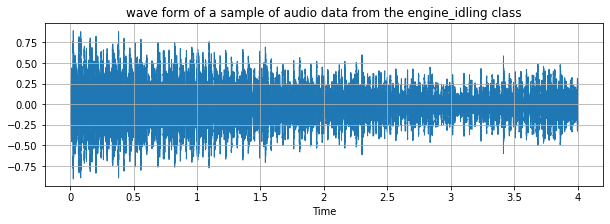

Audio data descriptive statistics
sample rate: 22050
min-value: -0.8998880982398987
max-value: 0.888179361820221
std: 0.24145060777664185
mean: -0.00018923249444924295
median: 0.05194053798913956
skew: -0.6868680934652236
kurtosis: -0.0255243831134071

 

Statictics for MFCC extract
min-value: -158.86585998535156
max-value: 171.1934356689453
std: 37.586181640625
mean: 4.714866638183594
median: 3.9711809158325195
skew: 0.10464399202864164
kurtosis: 15.611213241236054
176787-5-0-2.wav 5


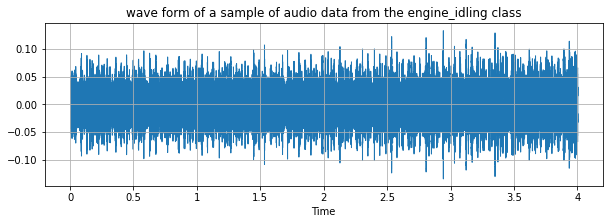

Audio data descriptive statistics
sample rate: 22050
min-value: -0.10973335802555084
max-value: 0.13403798639774323
std: 0.02627496048808098
mean: 1.4993038348620757e-06
median: -0.00039419252425432205
skew: 0.08666588366393359
kurtosis: 0.5367716834325553

 

Statictics for MFCC extract
min-value: -306.78814697265625
max-value: 187.41339111328125
std: 60.11392593383789
mean: -17.794281005859375
median: -11.032549858093262
skew: -1.8956100642273084
kurtosis: 13.95147064051535
207216-2-0-130.wav 2


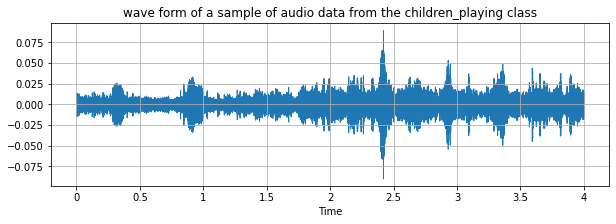

Audio data descriptive statistics
sample rate: 22050
min-value: -0.0897694006562233
max-value: 0.06606252491474152
std: 0.008237370289862156
mean: -0.00017440917144995183
median: -0.00017873584874905646
skew: 0.00892861597410401
kurtosis: 4.277213915419591

 

Statictics for MFCC extract
min-value: -361.7423095703125
max-value: 115.95556640625
std: 59.655548095703125
mean: -10.132909774780273
median: -2.551234245300293
skew: -4.880235965146666
kurtosis: 27.669833914507524
144068-5-5-2.wav 5


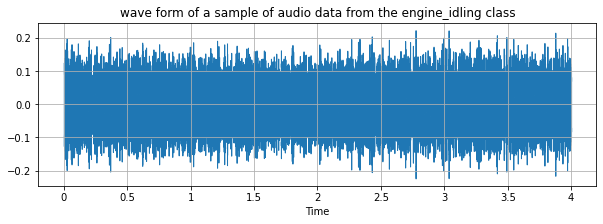

Audio data descriptive statistics
sample rate: 22050
min-value: -0.22292564809322357
max-value: 0.2235887348651886
std: 0.05103475600481033
mean: -0.00015384118887595832
median: 0.0003312355256639421
skew: -0.023844047876272968
kurtosis: 0.07306255907154702

 

Statictics for MFCC extract
min-value: -98.44950103759766
max-value: 80.38359069824219
std: 20.837833404541016
mean: -0.3991818428039551
median: 1.3373643159866333
skew: -1.153956430532037
kurtosis: 14.92080593823599
30832-3-1-0.wav 3


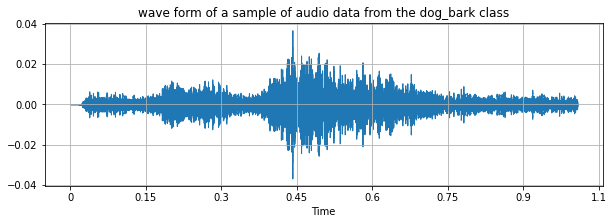

Audio data descriptive statistics
sample rate: 22050
min-value: -0.036761410534381866
max-value: 0.028583424165844917
std: 0.0045469109900295734
mean: 1.1856845048896503e-05
median: 0.0
skew: -0.09467283060522881
kurtosis: 4.948125374477291

 

Statictics for MFCC extract
min-value: -428.8963623046875
max-value: 94.21643829345703
std: 69.27777099609375
mean: -7.155376434326172
median: 1.3190791606903076
skew: -5.557901342865253
kurtosis: 31.451384654967256
167702-4-9-0.wav 4


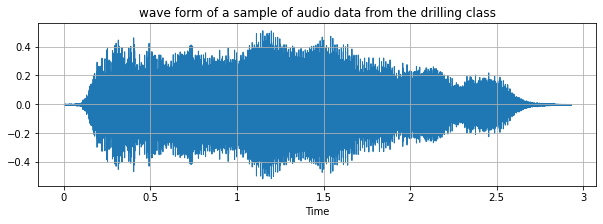

Audio data descriptive statistics
sample rate: 22050
min-value: -0.5140334963798523
max-value: 0.4760286808013916
std: 0.11482603847980499
mean: 1.990583768929355e-05
median: 0.00030064626480452716
skew: -0.17833067443357417
kurtosis: 1.1067973956398385

 

Statictics for MFCC extract
min-value: -133.5135955810547
max-value: 79.954833984375
std: 26.660171508789062
mean: -7.431725978851318
median: -5.745950698852539
skew: -1.9741961815636484
kurtosis: 12.83109097254519
147764-4-2-0.wav 4


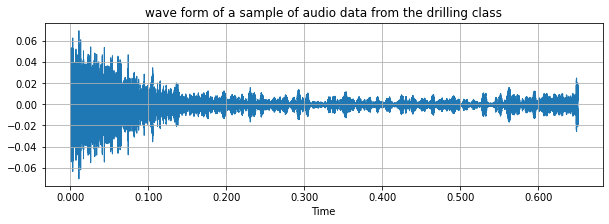

Audio data descriptive statistics
sample rate: 22050
min-value: -0.0700826644897461
max-value: 0.05355779826641083
std: 0.00816488265991211
mean: -0.00028440041933208704
median: -0.00025082810316234827
skew: -0.1338177436502302
kurtosis: 8.026452331621455

 

Statictics for MFCC extract
min-value: -403.2005310058594
max-value: 87.95885467529297
std: 65.77445983886719
mean: -4.899664402008057
median: 0.6328451633453369
skew: -5.469958436953116
kurtosis: 30.720316672398596
79089-0-0-75.wav 0


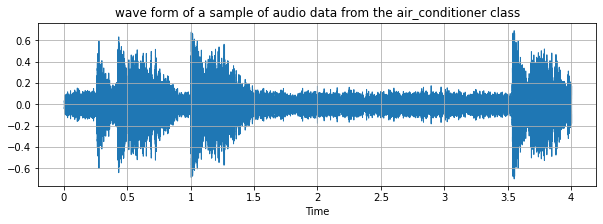

Audio data descriptive statistics
sample rate: 22050
min-value: -0.6831476092338562
max-value: 0.6959224939346313
std: 0.09624117612838745
mean: -0.0006204665405675769
median: -0.0006548049859702587
skew: 0.0467187527351413
kurtosis: 4.618292395695244

 

Statictics for MFCC extract
min-value: -94.93318939208984
max-value: 62.77006149291992
std: 18.690885543823242
mean: 0.8521183133125305
median: 2.5922012329101562
skew: -2.4453516550864456
kurtosis: 17.268770427030955
180029-4-5-0.wav 4


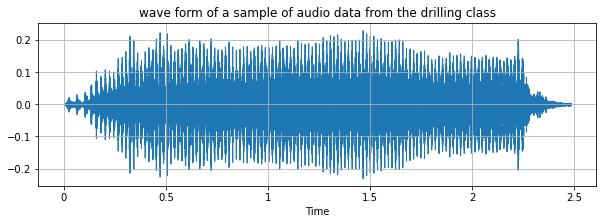

Audio data descriptive statistics
sample rate: 22050
min-value: -0.22412686049938202
max-value: 0.23017746210098267
std: 0.04857906326651573
mean: -1.291679723181005e-06
median: 0.001099976128898561
skew: -0.14459008529317774
kurtosis: 1.2776746639911396

 

Statictics for MFCC extract
min-value: -183.5830078125
max-value: 121.31105041503906
std: 35.4190559387207
mean: -6.025880813598633
median: -4.97009801864624
skew: -1.9893840797612246
kurtosis: 16.978850607545283
165529-2-0-6.wav 2


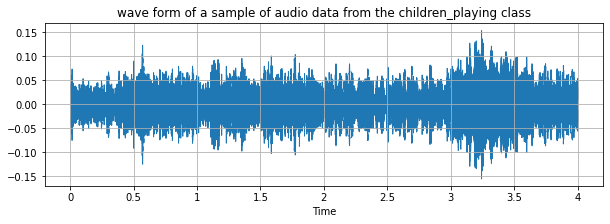

Audio data descriptive statistics
sample rate: 22050
min-value: -0.13275355100631714
max-value: 0.15414097905158997
std: 0.028572479262948036
mean: -2.5368261049152352e-05
median: -0.0002729523694142699
skew: 0.014694403017578898
kurtosis: 0.34404089761488565

 

Statictics for MFCC extract
min-value: -261.177978515625
max-value: 117.43792724609375
std: 46.00424575805664
mean: -0.4283061921596527
median: 2.5238938331604004
skew: -4.12628161659801
kurtosis: 23.883568258206484


In [10]:
# trying out 10 random audio samples from random classes
for i in range(0,10):
      random_folder = f'fold{random.choice(range(1,10))}'
      random_file = random.choice(os.listdir(config.AUDIO_FILES_PATH +'/'+ random_folder))
      class_file = int(random_file.split('-')[1])
      audio_file = os.path.join(random_folder,random_file)

      print(random_file,class_file)

      #display frequency 
      plt.figure(figsize=(10,3))
      sample_audio = os.path.join(config.AUDIO_FILES_PATH, audio_file)
      audio_data, sample_rate = librosa.load(sample_audio)
      librosa.display.waveshow(audio_data,sample_rate)
      plt.title(f'wave form of a sample of audio data from the {audio_classes[class_file]} class')
      plt.grid(True)
      plt.show()

      # some descriptive stats on raw and normalised audio data 
      print(f'Audio data descriptive statistics')
      print(f'sample rate: {sample_rate}')
      print(f'min-value: {np.min(audio_data)}')
      print(f'max-value: {np.max(audio_data)}')
      print(f'std: {np.std(audio_data)}')
      print(f'mean: {np.mean(audio_data)}')
      print(f'median: {np.median(audio_data)}')
      print(f'skew: {skew(audio_data)}')
      print(f'kurtosis: {kurtosis(audio_data)}')


      print('\n \n')
      # Mel-Frequency extract stats
      mfcc = librosa.feature.mfcc(y=audio_data,
                              sr=sample_rate,
                              n_mfcc=config.N_DIMS)
      mfcc = np.mean(mfcc.T, axis=0) # normalize the MFCC values

      print(f'Statictics for MFCC extract')
      print(f'min-value: {np.min(mfcc)}')
      print(f'max-value: {np.max(mfcc)}')
      print(f'std: {np.std(mfcc)}')
      print(f'mean: {np.mean(mfcc)}')
      print(f'median: {np.median(mfcc)}')
      print(f'skew: {skew(mfcc)}')
      print(f'kurtosis: {kurtosis(mfcc)}')

      # play audio
      playsound(sample_audio)

In [9]:
# check frequency cepstrums of similar classes
# choosing the dog_bark class with a class ID of 3
dog_bark = df[df['class'] == 'dog_bark']
dog_bark = dog_bark[['slice_file_name','fold','classID']].sample(5)
dog_bark

,slice_file_name,fold,classID
7341,69661-3-0-14.wav,10,3
6472,44110-3-1-0.wav,8,3
843,117048-3-0-25.wav,3,3
6267,38121-3-0-0.wav,6,3
5180,201207-3-29-0.wav,4,3


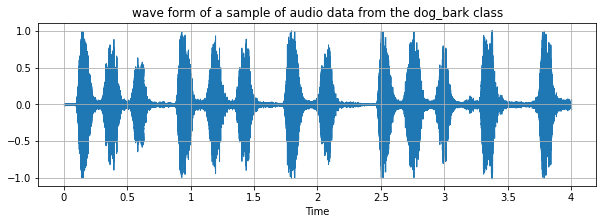

sample rate: 22050
min-value: -1.0111167430877686
max-value: 1.006793737411499
std: 0.17654681205749512
mean: 5.06846045027487e-05
median: 0.00024259916972368956
skew: 0.02509617490202615
kurtosis: 5.752220401295455

 

Statictics for MFCC extract
min-value: -177.74884033203125
max-value: 79.25105285644531
std: 34.887657165527344
mean: -6.925019264221191
median: -1.663311243057251
skew: -3.05613689278658
kurtosis: 13.699714274464732


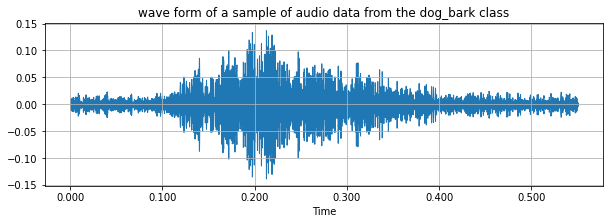

sample rate: 22050
min-value: -0.1378270387649536
max-value: 0.12049543112516403
std: 0.024461694061756134
mean: 0.00044859337504021823
median: 0.0005176222184672952
skew: -0.1556025376589223
kurtosis: 4.190988764377292

 

Statictics for MFCC extract
min-value: -328.9519958496094
max-value: 168.19024658203125
std: 58.64936828613281
mean: -4.106897830963135
median: 0.11967219412326813
skew: -3.6114903498113984
kurtosis: 22.39140815256498


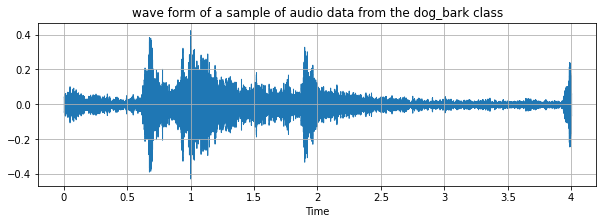

sample rate: 22050
min-value: -0.4252428114414215
max-value: 0.42087724804878235
std: 0.04585106670856476
mean: -0.0004923238884657621
median: -0.0005663657211698592
skew: 0.025742769475107154
kurtosis: 9.299557628310588

 

Statictics for MFCC extract
min-value: -347.9444274902344
max-value: 210.23822021484375
std: 64.69874572753906
mean: -2.9812049865722656
median: 1.3013092279434204
skew: -2.8988070735967284
kurtosis: 20.15688432445554


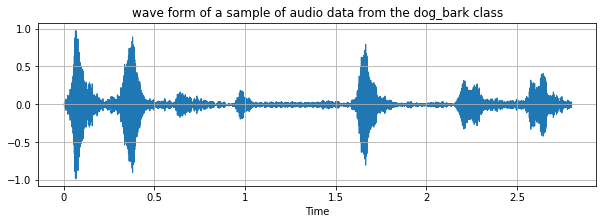

sample rate: 22050
min-value: -0.981192409992218
max-value: 0.9435539841651917
std: 0.10346664488315582
mean: -1.224719289893983e-05
median: -0.0010009580291807652
skew: -0.6092583413931206
kurtosis: 17.32441435109819

 

Statictics for MFCC extract
min-value: -246.2625274658203
max-value: 106.02118682861328
std: 42.6803092956543
mean: -1.1907010078430176
median: 2.075617790222168
skew: -4.3331335897099645
kurtosis: 25.1735822482345


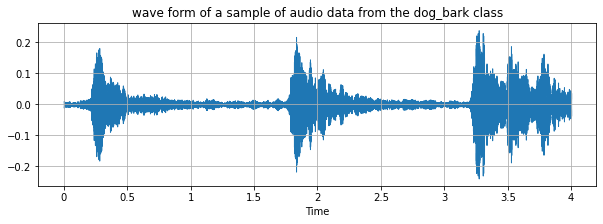

sample rate: 22050
min-value: -0.23967237770557404
max-value: 0.23033617436885834
std: 0.029865823686122894
mean: -8.908116910788522e-07
median: -6.621658394578844e-05
skew: 0.12441237221506404
kurtosis: 7.696513445669089

 

Statictics for MFCC extract
min-value: -399.3634033203125
max-value: 159.44810485839844
std: 67.59992980957031
mean: -12.339168548583984
median: -4.906159400939941
skew: -4.278841978074283
kurtosis: 24.903506395584788


In [13]:
file_name = list(dog_bark.slice_file_name)
folder = list(dog_bark.fold)

for filename, fold in zip(file_name, folder):
      audio_file = os.path.join(f'fold{str(fold)}',filename)

      plt.figure(figsize=(10,3))
      sample_audio = os.path.join(config.AUDIO_FILES_PATH,audio_file)
      audio_data, sample_rate = librosa.load(sample_audio)
      librosa.display.waveshow(audio_data,sample_rate)
      plt.title(f'wave form of a sample of audio data from the {audio_classes[3]} class')
      plt.grid(True)
      plt.show()

      print(f'sample rate: {sample_rate}')
      print(f'min-value: {np.min(audio_data)}')
      print(f'max-value: {np.max(audio_data)}')
      print(f'std: {np.std(audio_data)}')
      print(f'mean: {np.mean(audio_data)}')
      print(f'median: {np.median(audio_data)}')
      print(f'skew: {skew(audio_data)}')
      print(f'kurtosis: {kurtosis(audio_data)}')

      print('\n \n')

      # Mel-Frequency extract stats
      mfcc = librosa.feature.mfcc(y=audio_data,
                              sr=sample_rate,
                              n_mfcc=config.N_DIMS)
      mfcc = np.mean(mfcc.T, axis=0) # normalize the MFCC values

      print(f'Statictics for MFCC extract')
      print(f'min-value: {np.min(mfcc)}')
      print(f'max-value: {np.max(mfcc)}')
      print(f'std: {np.std(mfcc)}')
      print(f'mean: {np.mean(mfcc)}')
      print(f'median: {np.median(mfcc)}')
      print(f'skew: {skew(mfcc)}')
      print(f'kurtosis: {kurtosis(mfcc)}')


      # play audio
      playsound(sample_audio)

In [14]:
# dataset from new audio folders location
folders_labels = []
audio_paths = []

dirs = os.listdir(config.SAVE_PATH)
for dir in dirs:
      audios = os.listdir(os.path.join(config.SAVE_PATH, dir))
      for audio in audios:
            audio_paths.append(os.path.join(config.SAVE_PATH, dir) + '/' + audio)
            folders_labels.append(dir)

In [19]:
audio_df = pd.DataFrame({'Audio-path':audio_paths, 'label':folders_labels})
audio_df

,Audio-path,label
0,dataset/car_horn/7389-1-1-0.wav,car_horn
1,dataset/car_horn/72259-1-9-5.wav,car_horn
2,dataset/car_horn/183894-1-8-0.wav,car_horn
3,dataset/car_horn/43802-1-1-0.wav,car_horn
4,dataset/car_horn/94868-1-0-0.wav,car_horn
...,...,...
8727,dataset/drilling/39532-4-1-0.wav,drilling
8728,dataset/drilling/151005-4-0-0.wav,drilling
8729,dataset/drilling/58005-4-0-32.wav,drilling
8730,dataset/drilling/77751-4-0-1.wav,drilling


In [17]:
min_value_lst = []
max_value_lst = []
std_lst = []
mean_lst = []
median_lst = []
skew_lst = []
kurtosis_lst = []

In [20]:
# extract features
feature_extract = []

audio_paths = list(audio_df['Audio-path'])
for audio, count in zip(audio_paths, range(len(audio_paths))):
      features = utils.extract_features(audio)
      feature_extract.append(features) 

      # MFCC Stats data 
      min_value_lst.append(np.min(features))
      max_value_lst.append(np.max(features))
      std_lst.append(np.std(features))
      mean_lst.append(np.mean(features))
      median_lst.append(np.median(features))
      skew_lst.append(skew(features))
      kurtosis_lst.append(kurtosis(features))

      print(f'done for audio {count}')



done for audio 0
done for audio 1
done for audio 2
done for audio 3
done for audio 4
done for audio 5
done for audio 6
done for audio 7
done for audio 8
done for audio 9
done for audio 10
done for audio 11
done for audio 12
done for audio 13
done for audio 14
done for audio 15
done for audio 16
done for audio 17
done for audio 18
done for audio 19
done for audio 20
done for audio 21
done for audio 22
done for audio 23
done for audio 24
done for audio 25
done for audio 26
done for audio 27
done for audio 28
done for audio 29
done for audio 30
done for audio 31
done for audio 32
done for audio 33
done for audio 34
done for audio 35
done for audio 36
done for audio 37
done for audio 38
done for audio 39
done for audio 40
done for audio 41
done for audio 42
done for audio 43
done for audio 44
done for audio 45
done for audio 46
done for audio 47
done for audio 48
done for audio 49
done for audio 50
done for audio 51
done for audio 52
done for audio 53
done for audio 54
done for audio 55
do

In [21]:
print(len(feature_extract))

audio_df['MFCC-features'] = feature_extract
display(audio_df.head(5))

audio_df.to_csv(config.EXTRACTED_FEATURE_SAVE_PATH)

8732


,Audio-path,label,MFCC-features
0,dataset/car_horn/7389-1-1-0.wav,car_horn,"[-121.55058, 65.45534, -32.427902, 34.492073, ..."
1,dataset/car_horn/72259-1-9-5.wav,car_horn,"[-126.84716, 115.87754, -55.64741, 42.58142, -..."
2,dataset/car_horn/183894-1-8-0.wav,car_horn,"[-252.9698, 167.19125, -39.19234, 4.9301143, -..."
3,dataset/car_horn/43802-1-1-0.wav,car_horn,"[-132.8113, 55.07116, -1.1111865, 34.076862, 2..."
4,dataset/car_horn/94868-1-0-0.wav,car_horn,"[-264.63226, -33.122623, -17.734629, 40.243603..."


In [22]:
# preprocess extracted features dataset 
# drop unnecessary column
audio_df = audio_df.drop('Audio-path', axis=1)
audio_df.head(5)

,label,MFCC-features
0,car_horn,"[-121.55058, 65.45534, -32.427902, 34.492073, ..."
1,car_horn,"[-126.84716, 115.87754, -55.64741, 42.58142, -..."
2,car_horn,"[-252.9698, 167.19125, -39.19234, 4.9301143, -..."
3,car_horn,"[-132.8113, 55.07116, -1.1111865, 34.076862, 2..."
4,car_horn,"[-264.63226, -33.122623, -17.734629, 40.243603..."


In [30]:
mfcc_data = pd.DataFrame({'min_value':min_value_lst, 'max_value':max_value_lst, 'std':std_lst,
                         'mean':mean_lst, 'median':median_lst, 'skew':skew_lst, 'kurtosis':kurtosis_lst})

mfcc_data = mfcc_data.assign(labels=audio_df['label'])
mfcc_data

,min_value,max_value,std,mean,median,skew,kurtosis,labels
0,-121.550583,65.455338,24.580328,-2.251909,-0.704169,-2.281909,12.540225,car_horn
1,-126.847160,115.877541,31.312759,-0.769311,0.445877,-0.430298,8.797351,car_horn
2,-252.969803,167.191254,48.798847,-2.647705,0.021331,-2.326509,17.988012,car_horn
3,-132.811295,55.071159,26.491137,1.429906,2.026098,-2.966784,14.084645,car_horn
4,-264.632263,40.243603,45.578289,-8.555743,-3.226343,-4.335254,22.043105,car_horn
...,...,...,...,...,...,...,...,...
8727,-122.167442,27.085032,26.897406,-4.094758,3.500185,-2.720750,8.080559,drilling
8728,-133.940567,35.603207,24.261259,-3.582786,0.624641,-3.836582,18.226357,drilling
8729,-64.242607,43.882713,15.808039,-1.686942,-1.641500,-0.835131,5.579684,drilling
8730,-178.893692,154.043915,38.440590,-1.373351,-2.573030,-0.785039,15.074829,drilling


In [37]:
mfcc_data.to_csv(config.EXTRACTED_MFCC_FEATURE_SAVE_PATH)